  product_id  stock_cover  imbalance_score  is_overstocked  is_understocked
0       P001     3.979632        -3.367616           False             True
1       P002     3.933719        -3.317412           False             True
2       P003     2.625216        -4.311667           False             True
3       P004     2.591192        -4.339342           False             True
4       P005     3.555229        -3.581297           False             True
5       P006     6.836371        -1.914194            True             True
6       P007     2.566979        -4.360150           False             True
7       P008     6.466994        -2.157925            True             True
8       P009     3.621648        -3.486881           False             True
9       P010     3.705609        -3.477391           False             True


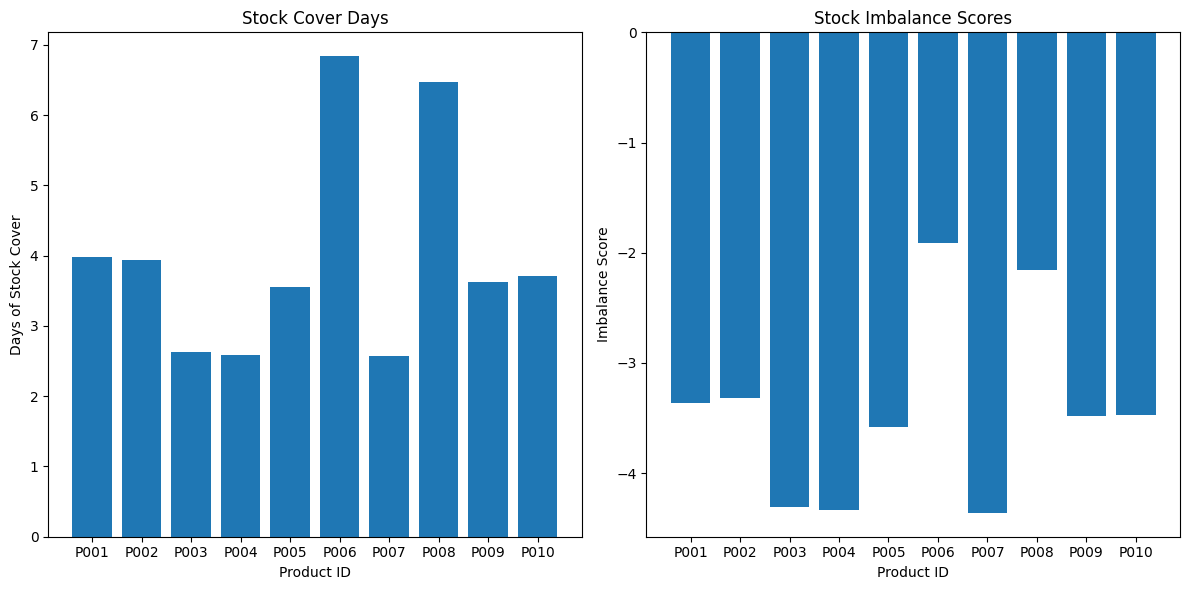

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the synthetic_data DataFrame from the SyntheticDemandGenerator

def calculate_stock_cover(current_stock, demand, days=7):
    """
    Calculate the number of days the stock will cover based on the demand forecast.
    """
    average_daily_demand = demand.rolling(window=days).mean()
    stock_cover = current_stock / average_daily_demand
    return stock_cover

def calculate_imbalance(stock_cover, target_range=(7, 14)):
    """
    Calculate the stock imbalance score.
    Products with stock cover outside the target range are considered imbalanced.
    Positive score means overstocking, negative means understocking.
    """
    lower, upper = target_range
    imbalance_score = np.where(stock_cover < lower, stock_cover - lower,
                               np.where(stock_cover > upper, stock_cover - upper, 0))
    return imbalance_score

def detect_cross_product_imbalances(df):
    """
    Detect cross-product imbalances by calculating stock cover and imbalance scores for all products.
    """
    imbalance_data = []

    for product_id, product_data in df.groupby('product_id'):
        # Calculate stock cover (number of days the stock will last)
        stock_cover = calculate_stock_cover(product_data['current_stock'], product_data['demand'])

        # Calculate imbalance score
        imbalance_score = calculate_imbalance(stock_cover)

        # Check if product is overstocked or understocked
        overstocked = imbalance_score > 0
        understocked = imbalance_score < 0

        imbalance_data.append({
            'product_id': product_id,
            'stock_cover': stock_cover.mean(),  # Average stock cover over time
            'imbalance_score': imbalance_score.mean(),
            'is_overstocked': overstocked.mean() > 0,
            'is_understocked': understocked.mean() > 0
        })

    return pd.DataFrame(imbalance_data)

def plot_stock_imbalances(imbalance_df):
    """
    Plot stock cover days and imbalance scores to visually identify overstocked and understocked products.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Stock Cover Plot
    ax[0].bar(imbalance_df['product_id'], imbalance_df['stock_cover'])
    ax[0].set_title('Stock Cover Days')
    ax[0].set_xlabel('Product ID')
    ax[0].set_ylabel('Days of Stock Cover')

    # Imbalance Score Plot
    ax[1].bar(imbalance_df['product_id'], imbalance_df['imbalance_score'])
    ax[1].set_title('Stock Imbalance Scores')
    ax[1].set_xlabel('Product ID')
    ax[1].set_ylabel('Imbalance Score')

    plt.tight_layout()
    plt.show()

def generate_imbalance_alerts(imbalance_df, imbalance_threshold=5):
    """
    Generate alerts for products that are significantly overstocked or understocked.
    """
    alerts = []
    for _, row in imbalance_df.iterrows():
        if row['imbalance_score'] > imbalance_threshold:
            alerts.append(f"Overstock Alert: Product {row['product_id']} has excessive stock.")
        elif row['imbalance_score'] < -imbalance_threshold:
            alerts.append(f"Understock Alert: Product {row['product_id']} is at risk of stockout.")
    return alerts

# Assuming synthetic_data is generated using the SyntheticDemandGenerator
# synthetic_data = generator.generate_data() # Example usage

synthetic_data = pd.read_csv('/content/synthetic_demand_data_4.csv')
# Detecting imbalances
imbalance_df = detect_cross_product_imbalances(synthetic_data)

# Display imbalance table
print(imbalance_df)

# Visualize stock imbalances
plot_stock_imbalances(imbalance_df)

# Generate and display imbalance alerts
alerts = generate_imbalance_alerts(imbalance_df)
for alert in alerts:
    print(alert)


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


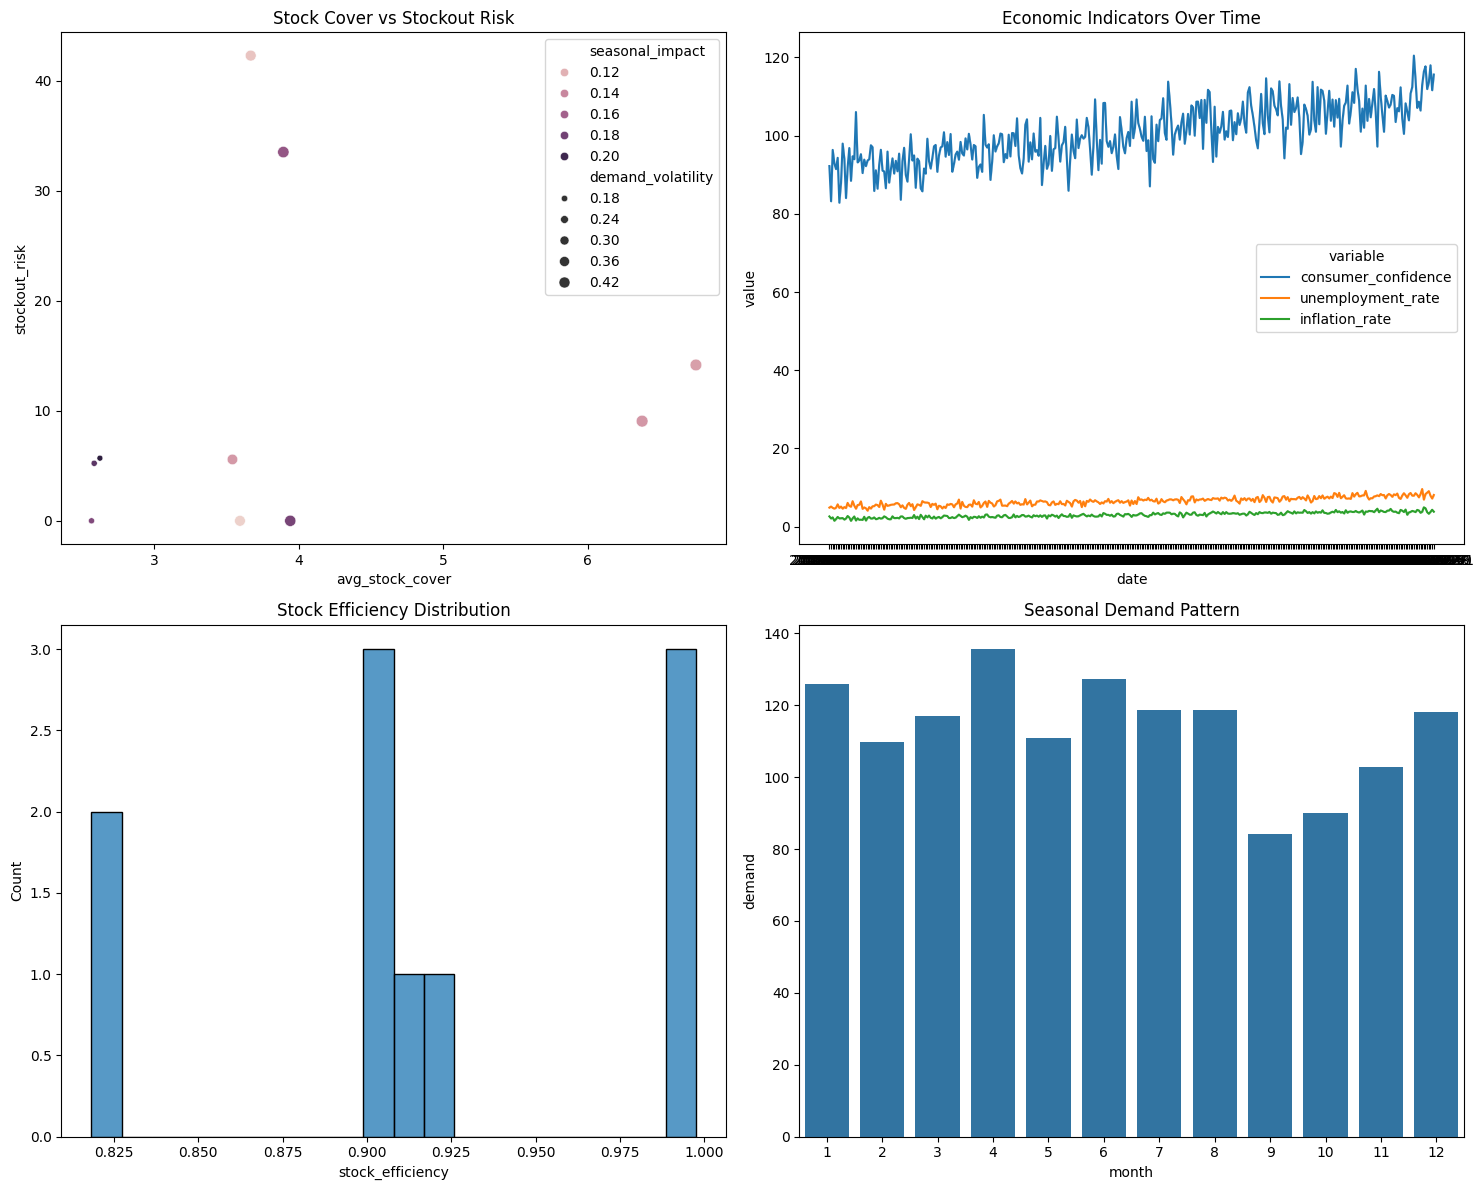

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict
from datetime import datetime

class EnhancedStockAnalyzer:
    def __init__(self, target_stock_range: Tuple[int, int] = (7, 14),
                 imbalance_threshold: float = 5.0):
        """
        Initialize the Enhanced Stock Analyzer specifically designed for the synthetic demand dataset.

        Args:
            target_stock_range: Tuple of (min_days, max_days) for ideal stock coverage
            imbalance_threshold: Threshold for generating alerts
        """
        self.target_stock_range = target_stock_range
        self.imbalance_threshold = imbalance_threshold

    def analyze_stock_health(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Analyze stock health using all available features from the synthetic dataset.

        Args:
            df: DataFrame with columns from the synthetic demand generator
        """
        analyses = []

        for product_id, product_data in df.groupby('product_id'):
            # Basic stock metrics
            stock_cover = self._calculate_stock_cover(product_data)
            imbalance_score = self._calculate_imbalance(stock_cover)

            # Advanced metrics using synthetic data features
            stockout_risk = self._calculate_stockout_risk(product_data)
            demand_volatility = self._calculate_demand_volatility(product_data)
            economic_impact = self._calculate_economic_impact(product_data)
            seasonal_impact = self._analyze_seasonal_patterns(product_data)

            analyses.append({
                'product_id': product_id,
                'avg_stock_cover': stock_cover.mean(),
                'imbalance_score': imbalance_score.mean(),
                'stockout_risk': stockout_risk,
                'demand_volatility': demand_volatility,
                'economic_impact': economic_impact,
                'seasonal_impact': seasonal_impact,
                'avg_lead_time': product_data['lead_time'].mean(),
                'reorder_point_effectiveness': self._evaluate_reorder_point(product_data),
                'promotion_sensitivity': self._calculate_promotion_sensitivity(product_data),
                'holiday_impact': self._calculate_holiday_impact(product_data),
                'stock_efficiency': self._calculate_stock_efficiency(product_data)
            })

        return pd.DataFrame(analyses)

    def _calculate_stock_cover(self, product_data: pd.DataFrame) -> pd.Series:
        """Calculate stock cover using demand rolling mean."""
        return product_data['current_stock'] / product_data['demand_rolling_mean'].replace(0, np.nan)

    def _calculate_imbalance(self, stock_cover: pd.Series) -> pd.Series:
        """Calculate stock imbalance considering target range."""
        lower, upper = self.target_stock_range
        return np.where(stock_cover < lower, stock_cover - lower,
                       np.where(stock_cover > upper, stock_cover - upper, 0))

    def _calculate_stockout_risk(self, product_data: pd.DataFrame) -> float:
        """
        Calculate stockout risk using multiple indicators:
        - Historical stockout days
        - Demand volatility
        - Current stock levels vs reorder point
        - Lead time consideration
        """
        stockout_frequency = product_data['stockout_days'].mean()
        demand_volatility = product_data['demand_rolling_std'].mean() / product_data['demand_rolling_mean'].mean()
        stock_level_ratio = (product_data['current_stock'].iloc[-1] / product_data['reorder_point'].iloc[-1])
        lead_time_factor = np.exp(-1/product_data['lead_time'].mean())

        risk_score = (0.4 * stockout_frequency +
                     0.3 * demand_volatility +
                     0.2 * (1 - stock_level_ratio) +
                     0.1 * lead_time_factor)

        return np.clip(risk_score * 100, 0, 100)

    def _calculate_demand_volatility(self, product_data: pd.DataFrame) -> float:
        """Calculate demand volatility considering seasonal and promotional effects."""
        base_volatility = product_data['demand_rolling_std'].mean() / product_data['demand_rolling_mean'].mean()
        seasonal_factor = 1 + 0.5 * product_data['is_peak_season'].mean()
        promo_factor = 1 + 0.3 * product_data['is_promotion'].mean()

        return base_volatility * seasonal_factor * promo_factor

    def _calculate_economic_impact(self, product_data: pd.DataFrame) -> float:
        """Analyze economic indicators' impact on stock management."""
        confidence_impact = product_data['consumer_confidence'].corr(product_data['demand'])
        unemployment_impact = product_data['unemployment_rate'].corr(product_data['demand'])
        inflation_impact = product_data['inflation_rate'].corr(product_data['demand'])

        return np.mean([confidence_impact, -unemployment_impact, -inflation_impact])

    def _analyze_seasonal_patterns(self, product_data: pd.DataFrame) -> float:
        """Analyze seasonal patterns in demand and stock levels."""
        seasonal_demand = product_data.groupby('month')['demand'].mean()
        seasonal_variation = seasonal_demand.std() / seasonal_demand.mean()
        peak_season_impact = product_data.loc[product_data['is_peak_season'] == 1, 'demand'].mean() / \
                            product_data['demand'].mean()

        return seasonal_variation * peak_season_impact

    def _evaluate_reorder_point(self, product_data: pd.DataFrame) -> float:
        """Evaluate effectiveness of current reorder point."""
        stockouts_after_reorder = product_data.loc[
            (product_data['current_stock'] <= product_data['reorder_point']) &
            (product_data['stockout_days'].shift(-1) == 1)
        ].shape[0]

        total_reorders = product_data[product_data['current_stock'] <= product_data['reorder_point']].shape[0]

        return 1 - (stockouts_after_reorder / total_reorders if total_reorders > 0 else 0)

    def _calculate_promotion_sensitivity(self, product_data: pd.DataFrame) -> float:
        """Calculate how promotions affect demand and stock levels."""
        regular_demand = product_data.loc[product_data['is_promotion'] == 0, 'demand'].mean()
        promo_demand = product_data.loc[product_data['is_promotion'] == 1, 'demand'].mean()

        return (promo_demand / regular_demand - 1) if regular_demand > 0 else 0

    def _calculate_holiday_impact(self, product_data: pd.DataFrame) -> float:
        """Calculate holiday impact on stock requirements."""
        regular_demand = product_data.loc[product_data['is_holiday'] == 0, 'demand'].mean()
        holiday_demand = product_data.loc[product_data['is_holiday'] == 1, 'demand'].mean()

        return (holiday_demand / regular_demand - 1) if regular_demand > 0 else 0

    def _calculate_stock_efficiency(self, product_data: pd.DataFrame) -> float:
        """Calculate overall stock efficiency score."""
        turnover_rate = product_data['demand'].sum() / product_data['current_stock'].mean()
        stockout_rate = product_data['stockout_days'].mean()
        excess_stock_rate = (product_data['current_stock'] > product_data['max_stock']).mean()

        efficiency_score = (0.4 * min(turnover_rate / 12, 1) +  # Normalize to monthly turnover
                          0.3 * (1 - stockout_rate) +
                          0.3 * (1 - excess_stock_rate))

        return efficiency_score

    def generate_recommendations(self, analysis_df: pd.DataFrame) -> List[Dict]:
        """Generate detailed recommendations based on analysis."""
        recommendations = []

        for _, row in analysis_df.iterrows():
            product_recs = {
                'product_id': row['product_id'],
                'recommendations': []
            }

            # Stock level recommendations
            if row['imbalance_score'] > self.imbalance_threshold:
                product_recs['recommendations'].append({
                    'type': 'REDUCE_STOCK',
                    'priority': 'HIGH' if row['economic_impact'] < 0 else 'MEDIUM',
                    'action': 'Reduce stock levels and adjust reorder point downward',
                    'reason': 'Excessive stock levels detected with negative economic indicators'
                })
            elif row['stockout_risk'] > 50:
                product_recs['recommendations'].append({
                    'type': 'INCREASE_STOCK',
                    'priority': 'HIGH',
                    'action': 'Increase safety stock and reorder point',
                    'reason': 'High stockout risk detected'
                })

            # Seasonal adjustments
            if row['seasonal_impact'] > 0.3:
                product_recs['recommendations'].append({
                    'type': 'SEASONAL_ADJUSTMENT',
                    'priority': 'MEDIUM',
                    'action': 'Implement seasonal stock level adjustments',
                    'reason': 'Strong seasonal patterns detected'
                })

            # Promotion handling
            if row['promotion_sensitivity'] > 0.5:
                product_recs['recommendations'].append({
                    'type': 'PROMOTION_PLANNING',
                    'priority': 'MEDIUM',
                    'action': 'Increase stock levels before promotions',
                    'reason': 'High promotion sensitivity detected'
                })

            recommendations.append(product_recs)

        return recommendations

    def visualize_analysis(self, analysis_df: pd.DataFrame, original_data: pd.DataFrame):
        """Create comprehensive visualization of stock analysis."""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Stock Cover vs Stockout Risk
        sns.scatterplot(data=analysis_df,
                       x='avg_stock_cover',
                       y='stockout_risk',
                       size='demand_volatility',
                       hue='seasonal_impact',
                       ax=axes[0, 0])
        axes[0, 0].set_title('Stock Cover vs Stockout Risk')

        # Economic Impact Analysis
        economic_impact = pd.melt(original_data[['date', 'consumer_confidence', 'unemployment_rate', 'inflation_rate']],
                                id_vars=['date'])
        sns.lineplot(data=economic_impact, x='date', y='value', hue='variable', ax=axes[0, 1])
        axes[0, 1].set_title('Economic Indicators Over Time')

        # Stock Efficiency Distribution
        sns.histplot(data=analysis_df, x='stock_efficiency', bins=20, ax=axes[1, 0])
        axes[1, 0].set_title('Stock Efficiency Distribution')

        # Seasonal and Holiday Impact
        seasonal_data = original_data.groupby('month')['demand'].mean().reset_index()
        sns.barplot(data=seasonal_data, x='month', y='demand', ax=axes[1, 1])
        axes[1, 1].set_title('Seasonal Demand Pattern')

        plt.tight_layout()
        plt.show()

# Create the analyzer
analyzer = EnhancedStockAnalyzer()

# Load your synthetic data
synthetic_data = pd.read_csv("synthetic_demand_data_4.csv")

# Perform analysis
analysis = analyzer.analyze_stock_health(synthetic_data)

# Generate recommendations
recommendations = analyzer.generate_recommendations(analysis)

# Visualize results
analyzer.visualize_analysis(analysis, synthetic_data)

  product_id  avg_stock_cover  imbalance_score  stockout_risk  \
0  product_1         2.772770        -4.227230      22.537236   
1  product_2         3.296141        -3.751240       0.000000   
2  product_3         2.688006        -4.334659      20.003220   
3  product_4         3.467673        -3.746741       0.000000   
4  product_5         3.009105        -3.990895       0.000000   

   demand_volatility  economic_impact  seasonal_impact  avg_lead_time  \
0           0.183864         0.011470         0.148720       2.833333   
1           0.233620         0.055337         0.091242       2.857143   
2           0.199418        -0.059599         0.097819       3.750000   
3           0.173516        -0.050619         0.041648       4.153846   
4           0.180740        -0.043227         0.062342       3.157895   

   reorder_point_effectiveness  promotion_sensitivity  holiday_impact  \
0                          1.0               0.260606        0.016010   
1                       

<ipython-input-4-a51aeb48645a>:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='stockout_risk', data=analysis_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

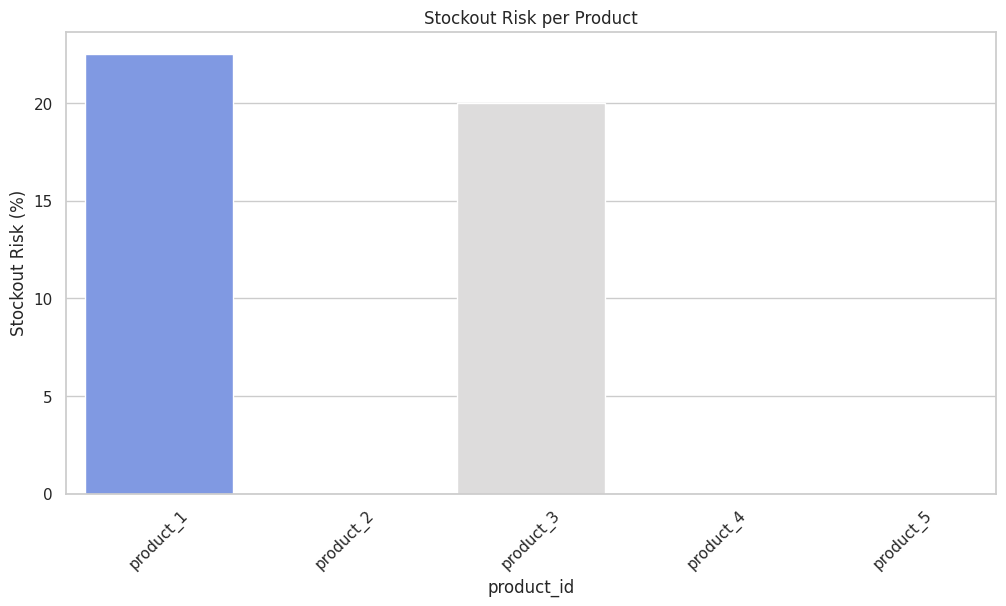

<ipython-input-4-a51aeb48645a>:218: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='economic_impact', data=analysis_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When

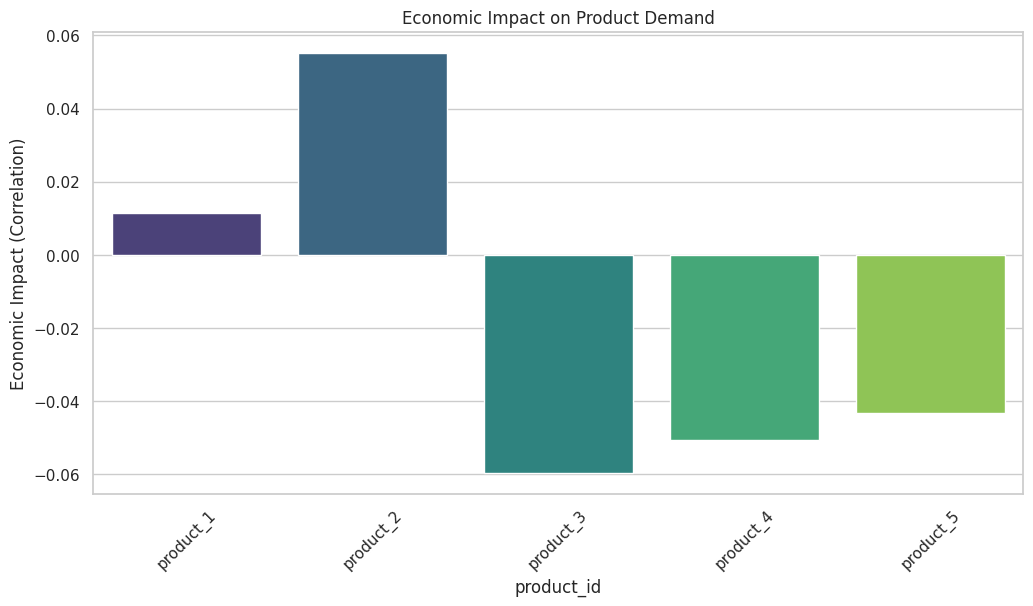

<ipython-input-4-a51aeb48645a>:226: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='stock_efficiency', data=analysis_df, palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

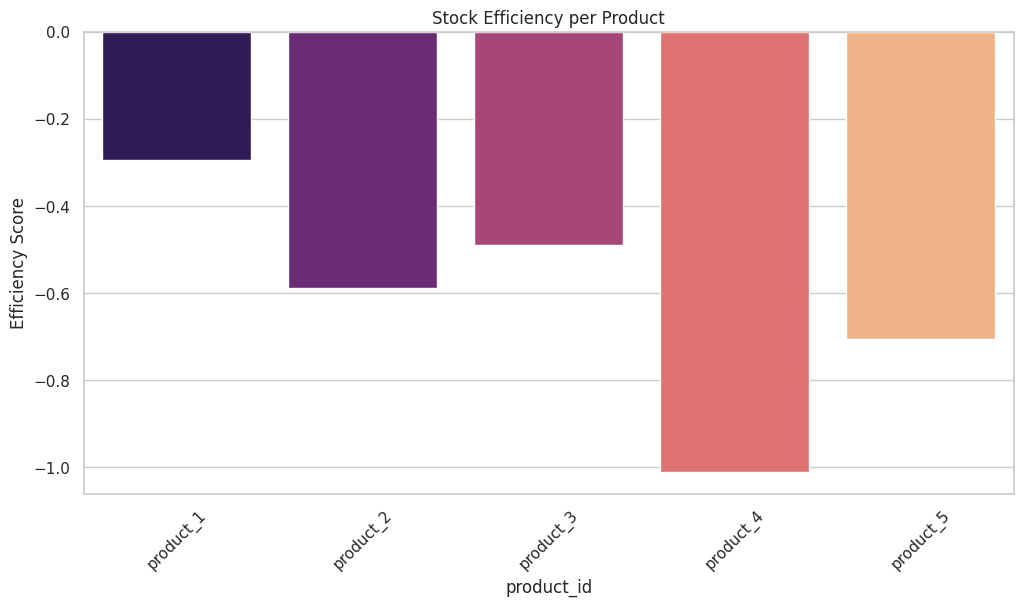

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict
from datetime import datetime

class EnhancedStockAnalyzer:
    def __init__(self, target_stock_range: Tuple[int, int] = (7, 14),
                 imbalance_threshold: float = 5.0,
                 max_stockout_days: int = 30,  # For normalization in stockout risk
                 demand_volatility_threshold: float = 0.5):
        """
        Initialize the Enhanced Stock Analyzer specifically designed for the synthetic demand dataset.

        Args:
            target_stock_range: Tuple of (min_days, max_days) for ideal stock coverage
            imbalance_threshold: Threshold for generating alerts
            max_stockout_days: Maximum stockout days for normalizing stockout risk
            demand_volatility_threshold: Threshold for normalizing demand volatility
        """
        self.target_stock_range = target_stock_range
        self.imbalance_threshold = imbalance_threshold
        self.max_stockout_days = max_stockout_days
        self.demand_volatility_threshold = demand_volatility_threshold

    def analyze_stock_health(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Analyze stock health using all available features from the synthetic dataset.

        Args:
            df: DataFrame with columns from the synthetic demand generator
        """
        analyses = []

        for product_id, product_data in df.groupby('product_id'):
            # Basic stock metrics
            stock_cover = self._calculate_stock_cover(product_data)
            imbalance_score = self._calculate_imbalance(stock_cover)

            # Advanced metrics using synthetic data features
            stockout_risk = self._calculate_stockout_risk(product_data)
            demand_volatility = self._calculate_demand_volatility(product_data)
            economic_impact = self._calculate_economic_impact(product_data)
            seasonal_impact = self._analyze_seasonal_patterns(product_data)

            analyses.append({
                'product_id': product_id,
                'avg_stock_cover': stock_cover.mean(),
                'imbalance_score': imbalance_score.mean(),
                'stockout_risk': stockout_risk,
                'demand_volatility': demand_volatility,
                'economic_impact': economic_impact,
                'seasonal_impact': seasonal_impact,
                'avg_lead_time': product_data['lead_time'].mean(),
                'reorder_point_effectiveness': self._evaluate_reorder_point(product_data),
                'promotion_sensitivity': self._calculate_promotion_sensitivity(product_data),
                'holiday_impact': self._calculate_holiday_impact(product_data),
                'stock_efficiency': self._calculate_stock_efficiency(product_data)
            })

        return pd.DataFrame(analyses)

    def _calculate_stock_cover(self, product_data: pd.DataFrame) -> pd.Series:
        """Calculate stock cover using demand rolling mean."""
        return product_data['current_stock'] / product_data['demand_rolling_mean'].replace(0, np.nan)

    def _calculate_imbalance(self, stock_cover: pd.Series) -> pd.Series:
        """Calculate stock imbalance considering target range."""
        lower, upper = self.target_stock_range
        return np.where(stock_cover < lower, stock_cover - lower,
                        np.where(stock_cover > upper, stock_cover - upper, 0))

    def _calculate_stockout_risk(self, product_data: pd.DataFrame) -> float:
        """
        Calculate stockout risk using multiple indicators:
        - Historical stockout days
        - Demand volatility
        - Current stock levels vs reorder point
        - Lead time consideration
        """
        stockout_frequency = product_data['stockout_days'].mean() / self.max_stockout_days
        demand_volatility = product_data['demand_rolling_std'].mean() / product_data['demand_rolling_mean'].mean()
        demand_volatility = min(demand_volatility / self.demand_volatility_threshold, 1)
        stock_level_ratio = product_data['current_stock'].iloc[-1] / product_data['reorder_point'].iloc[-1]
        lead_time_factor = np.exp(-1 / product_data['lead_time'].mean())

        risk_score = (0.4 * stockout_frequency +
                     0.3 * demand_volatility +
                     0.2 * (1 - stock_level_ratio) +
                     0.1 * lead_time_factor)

        return np.clip(risk_score * 100, 0, 100)

    def _calculate_demand_volatility(self, product_data: pd.DataFrame) -> float:
        """Calculate demand volatility considering seasonal and promotional effects."""
        base_volatility = product_data['demand_rolling_std'].mean() / product_data['demand_rolling_mean'].mean()
        seasonal_factor = 1 + 0.5 * product_data['is_peak_season'].mean()
        promo_factor = 1 + 0.3 * product_data['is_promotion'].mean()

        return base_volatility * seasonal_factor * promo_factor

    def _calculate_economic_impact(self, product_data: pd.DataFrame) -> float:
        """Analyze economic indicators' impact on stock management."""
        confidence_impact = product_data['consumer_confidence'].corr(product_data['demand'])
        unemployment_impact = product_data['unemployment_rate'].corr(product_data['demand'])
        inflation_impact = product_data['inflation_rate'].corr(product_data['demand'])

        return np.nanmean([confidence_impact, -unemployment_impact, -inflation_impact])

    def _analyze_seasonal_patterns(self, product_data: pd.DataFrame) -> float:
        """Analyze seasonal patterns in demand and stock levels."""
        seasonal_demand = product_data.groupby('month')['demand'].mean()
        seasonal_variation = seasonal_demand.std() / seasonal_demand.mean()
        peak_season_impact = product_data.loc[product_data['is_peak_season'] == 1, 'demand'].mean() / \
                            product_data['demand'].mean()

        return seasonal_variation * peak_season_impact

    def _evaluate_reorder_point(self, product_data: pd.DataFrame) -> float:
        """Evaluate effectiveness of current reorder point."""
        stockouts_after_reorder = product_data.loc[
            (product_data['current_stock'] <= product_data['reorder_point']) &
            (product_data['stockout_days'].shift(-1) == 1)
        ].shape[0]

        total_reorders = product_data[product_data['current_stock'] <= product_data['reorder_point']].shape[0]

        return 1 - (stockouts_after_reorder / total_reorders if total_reorders > 0 else 0)

    def _calculate_promotion_sensitivity(self, product_data: pd.DataFrame) -> float:
        """Calculate how promotions affect demand and stock levels."""
        regular_demand = product_data.loc[product_data['is_promotion'] == 0, 'demand'].mean()
        promo_demand = product_data.loc[product_data['is_promotion'] == 1, 'demand'].mean()

        return (promo_demand / regular_demand - 1) if regular_demand > 0 else 0

    def _calculate_holiday_impact(self, product_data: pd.DataFrame) -> float:
        """Calculate holiday impact on stock requirements."""
        regular_demand = product_data.loc[product_data['is_holiday'] == 0, 'demand'].mean()
        holiday_demand = product_data.loc[product_data['is_holiday'] == 1, 'demand'].mean()

        return (holiday_demand / regular_demand - 1) if regular_demand > 0 else 0

    def _calculate_stock_efficiency(self, product_data: pd.DataFrame) -> float:
        """Calculate overall stock efficiency score."""
        turnover_rate = product_data['demand'].sum() / product_data['current_stock'].mean()
        stockout_rate = product_data['stockout_days'].mean()
        excess_stock_rate = (product_data['current_stock'] > product_data['max_stock']).mean()

        efficiency_score = (0.4 * min(turnover_rate / 12, 1) +  # Normalize to monthly turnover
                          0.3 * (1 - stockout_rate) +
                          0.3 * (1 - excess_stock_rate))

        return efficiency_score

    def generate_recommendations(self, analysis_df: pd.DataFrame) -> List[Dict]:
        """Generate detailed recommendations based on analysis."""
        recommendations = []

        for _, row in analysis_df.iterrows():
            product_recs = {
                'product_id': row['product_id'],
                'recommendations': []
            }

            # Stock level recommendations
            if row['imbalance_score'] > self.imbalance_threshold:
                product_recs['recommendations'].append({
                    'type': 'REDUCE_STOCK',
                    'priority': 'HIGH' if row['economic_impact'] < 0 else 'MEDIUM',
                    'action': 'Reduce stock levels and adjust reorder point downward',
                    'reason': 'Excessive stock levels detected with negative economic indicators'
                })
            elif row['stockout_risk'] > 50:
                product_recs['recommendations'].append({
                    'type': 'INCREASE_STOCK',
                    'priority': 'HIGH',
                    'action': 'Increase safety stock and reorder point',
                    'reason': 'High stockout risk and volatile demand patterns'
                })

            # Seasonal or promotional adjustments
            if row['seasonal_impact'] > 1.2:
                product_recs['recommendations'].append({
                    'type': 'INCREASE_SEASONAL_STOCK',
                    'priority': 'MEDIUM',
                    'action': 'Increase stock during peak seasons',
                    'reason': 'Seasonal demand fluctuations detected'
                })

            if row['promotion_sensitivity'] > 0.3:
                product_recs['recommendations'].append({
                    'type': 'PROMOTION_PLANNING',
                    'priority': 'LOW',
                    'action': 'Prepare for promotional demand surges',
                    'reason': 'Significant increase in demand during promotions'
                })

            recommendations.append(product_recs)

        return recommendations

    def visualize_analysis(self, analysis_df: pd.DataFrame):
        """Create visualizations to summarize stock analysis insights."""
        sns.set(style="whitegrid")

        # Stockout risk plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x='product_id', y='stockout_risk', data=analysis_df, palette='coolwarm')
        plt.title('Stockout Risk per Product')
        plt.ylabel('Stockout Risk (%)')
        plt.xticks(rotation=45)
        plt.show()

        # Economic impact plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x='product_id', y='economic_impact', data=analysis_df, palette='viridis')
        plt.title('Economic Impact on Product Demand')
        plt.ylabel('Economic Impact (Correlation)')
        plt.xticks(rotation=45)
        plt.show()

        # Stock efficiency plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x='product_id', y='stock_efficiency', data=analysis_df, palette='magma')
        plt.title('Stock Efficiency per Product')
        plt.ylabel('Efficiency Score')
        plt.xticks(rotation=45)
        plt.show()
import pandas as pd
import numpy as np

# Sample DataFrame creation
def create_sample_data():
    np.random.seed(42)  # For reproducibility
    num_records = 100
    product_ids = [f'product_{i}' for i in range(1, 6)]

    data = {
        'date': pd.date_range(start='2024-01-01', periods=num_records, freq='D'),
        'product_id': np.random.choice(product_ids, num_records),
        'demand': np.random.poisson(20, num_records),  # Random demand data
        'current_stock': np.random.randint(10, 100, num_records),
        'stockout_days': np.random.randint(0, 10, num_records),
        'lead_time': np.random.randint(1, 7, num_records),  # Days
        'reorder_point': np.random.randint(15, 30, num_records),
        'max_stock': np.random.randint(50, 150, num_records),
        'is_promotion': np.random.choice([0, 1], num_records, p=[0.8, 0.2]),  # 20% promotions
        'is_holiday': np.random.choice([0, 1], num_records, p=[0.7, 0.3]),  # 30% holidays
        'is_peak_season': np.random.choice([0, 1], num_records, p=[0.6, 0.4]),  # 40% peak season
        'consumer_confidence': np.random.uniform(0.5, 1.0, num_records),
        'unemployment_rate': np.random.uniform(3, 10, num_records),
        'inflation_rate': np.random.uniform(1, 5, num_records),
        'demand_rolling_mean': np.random.uniform(10, 30, num_records),
        'demand_rolling_std': np.random.uniform(1, 5, num_records),
        'month': pd.date_range(start='2024-01-01', periods=num_records, freq='D').month
    }

    return pd.DataFrame(data)

# Create sample data
df = create_sample_data()

# Initialize the Enhanced Stock Analyzer
analyzer = EnhancedStockAnalyzer()

# Analyze stock health
analysis_results = analyzer.analyze_stock_health(df)

# Print the analysis results
print(analysis_results)

# Generate recommendations based on the analysis
recommendations = analyzer.generate_recommendations(analysis_results)

# Print the recommendations
for rec in recommendations:
    print(f"Recommendations for {rec['product_id']}:")
    for recommendation in rec['recommendations']:
        print(f"- {recommendation['action']} (Priority: {recommendation['priority']})")

# Visualize the analysis results
analyzer.visualize_analysis(analysis_results)

